Jupyter notebook - QIT DPDA demo
===============================

In [30]:
# add QIT to the path
import sys
sys.path.insert(0, "/home/sur096/projects/pyqit/src")


In [31]:
# import ipywidgets for interactive control elements
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from IPython.display import display

In [32]:
import qit
import qit.ext.automata

In [33]:
# generate pda
def get_pda(n_size=2, s_size=2, a_size=2):
    states = qit.Range(n_size)
    symbols = qit.Range(s_size)
    actions = qit.Range(a_size)
    
    stack_change = qit.Join((qit.Sequence(symbols, 0),
                             qit.Sequence(symbols, 1),
                             qit.Sequence(symbols, 2)),
                            ratios=(1, 1, 1))

    lrule = states * symbols * actions
    rrule = states * stack_change
    return qit.Mapping(lrule, rrule)

In [59]:
# widget that may change its parameters
pda1_w = interactive(get_pda, n_size=(1,6), s_size=(1,3), a_size=(1,3))
display(pda1_w) 

<Mapping size=1475789056 {{(1, 1, 0): (0, ()), (0, 1, 1): (0, ()), (1, , ...}>

In [62]:
def pda_to_graph(pda1):
    def rule_fn(lhs, rhs):
        state, symbol, action = lhs
        new_state, new_symbols = rhs
        new_symbols = ",".join(map(str, new_symbols))
        label = "{},{}/{}".format(symbol, action, new_symbols)
        return (state, label, new_state)
    return qit.ext.automata.transition_fn_to_graph(pda1, rule_fn, 0)

p = list(pda1_w.result.generate(1))

g = pda_to_graph(p[0])


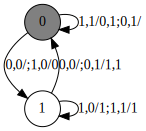

In [63]:
from graphviz import Source
src = Source(g.make_dot("test"))
src